No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


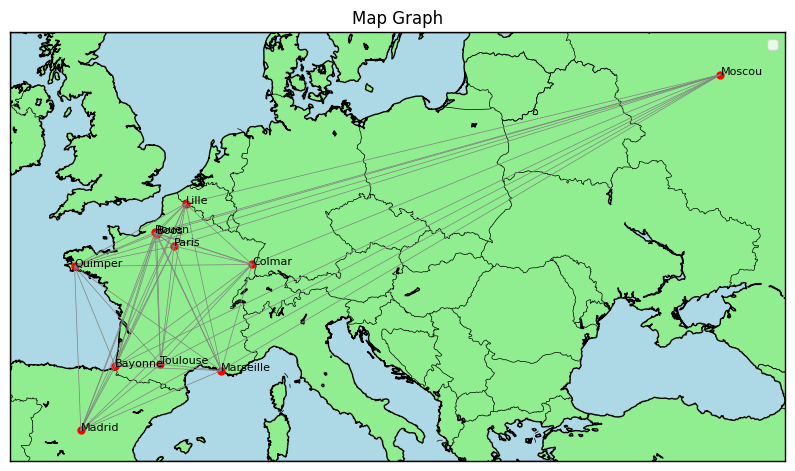

In [1]:
import numpy as np
import random
from Enums.GraphType import GraphType
from Graphs.RandomGraph import RandomGraph
from Graphs.MapGraph import MapGraph
random.seed(0)
np,random.seed(0)

intialGraph = None #todo remove : useless

graph_type = GraphType.Map
match graph_type:
    case GraphType.Random:
        #create random graph
        graph = RandomGraph(node_number=5,min_weight=1,max_weight=10)
    
    case GraphType.Map:
        # cities = [
        #     "Boos", "Rouen", "Franqueville-Saint-Pierre", "Le Mesnil-Esnard", "Saint-Etienne-Du-Rouvray",
        #     "Montmain", "Bois-Guillaume", "Bonsecours", "Sotteville-lès-Rouen", "Mont-Saint-Aignan",
        #     "Le Grand-Quevilly", "Le Petit-Quevilly", "Canteleu", "Déville-lès-Rouen", "Darnétal",
        #     "Elbeuf", "Oissel", "Maromme", "Cléon", "Saint-Aubin-lès-Elbeuf", "Saint-Aubin-Celloville",
        #     "Saint-Martin-du-Vivier", "Saint-Jacques-sur-Darnétal", "Saint-Léger-du-Bourg-Denis",
        #     "Saint-Pierre-de-Manneville", "Saint-Pierre-de-Varengeville", "Saint-Martin-de-Boscherville",
        #     "Saint-Aubin-Épinay", "Saint-Paër", "Isneauville", "Hénouville", "Houppeville", "Malaunay",
        #     "Jumièges", "La Bouille", "Duclair", "Notre-Dame-de-Bondeville", "Petit-Couronne"
        # ]

        #cities = ["Bouffry","Yermenonville","Valennes","Mondoubleau","Arquenay", "Nantes", "Boos", "La Rochelle", "Bordeaux", "Toulouse", "Montpellier", "Marseille", "Lyon", "Le Mans", "Riom","Bergerac","Vic-sur-Cère", "Clermont-Ferrand","Sucé-sur-Erdre", "Rezé","Rieux"]
        cities = ["Marseille", "Rouen", "Lille", "Quimper", "Colmar", "Paris", "Bayonne", "Toulouse", "Madrid", "Moscou"]
        #create real graph
        graph = MapGraph(cities=cities,start_city="Boos")

graph.plot_graph()

Removed 0 edges of 55
Costed 0 edges of 55


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


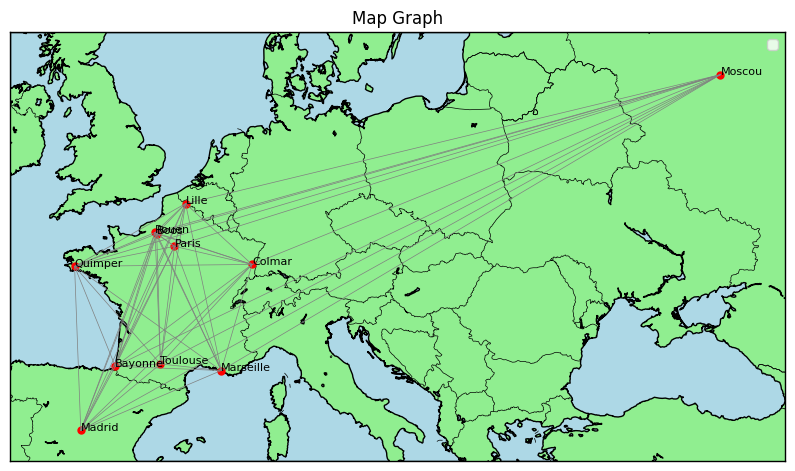

In [2]:
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)

graph.plot_graph()

Algorithm ACO : 500 ants : 

Best path: ['Boos', 'Rouen', 'Paris', 'Lille', 'Moscou', 'Colmar', 'Marseille', 'Toulouse', 'Bayonne', 'Madrid', 'Quimper', 'Boos']
Total distance: 7645.825178056748
Number of iterations needed to find the solution : 11
Total number of iterations : 51


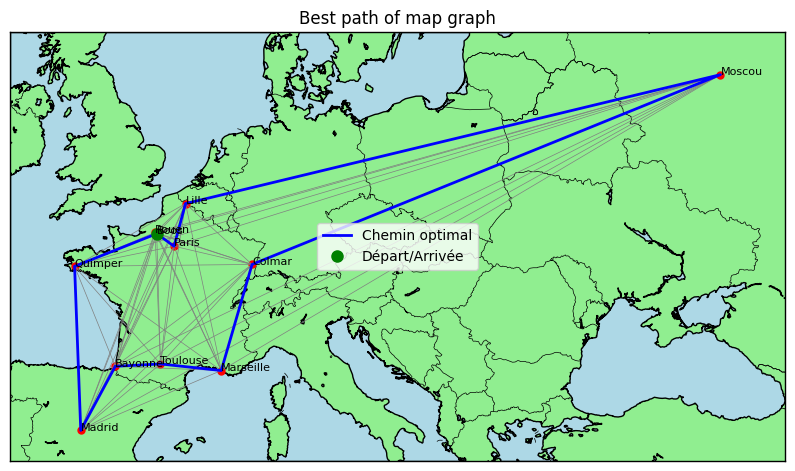

Algorithm ACO : 100 ants : 

Best path: ['Boos', 'Rouen', 'Paris', 'Lille', 'Moscou', 'Colmar', 'Marseille', 'Toulouse', 'Bayonne', 'Madrid', 'Quimper', 'Boos']
Total distance: 7645.825178056748
Number of iterations needed to find the solution : 17
Total number of iterations : 51


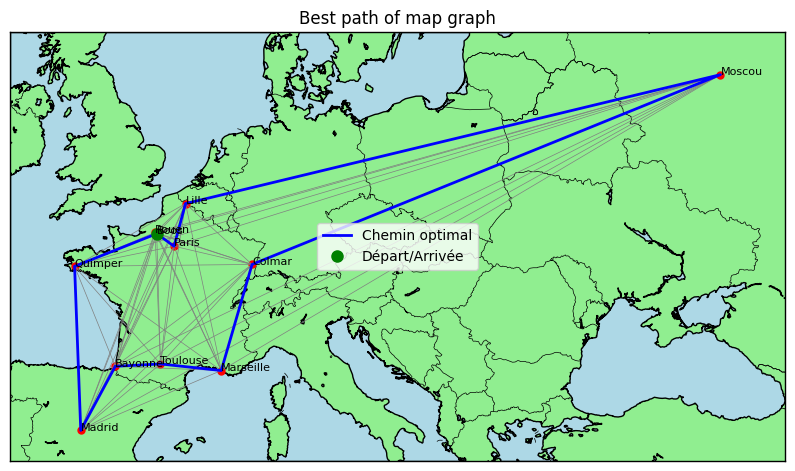

Algorithm ACO : 10 ants : 

Best path: ['Boos', 'Rouen', 'Paris', 'Lille', 'Quimper', 'Madrid', 'Bayonne', 'Toulouse', 'Marseille', 'Colmar', 'Moscou', 'Boos']
Total distance: 8006.570206177459
Number of iterations needed to find the solution : 25
Total number of iterations : 51


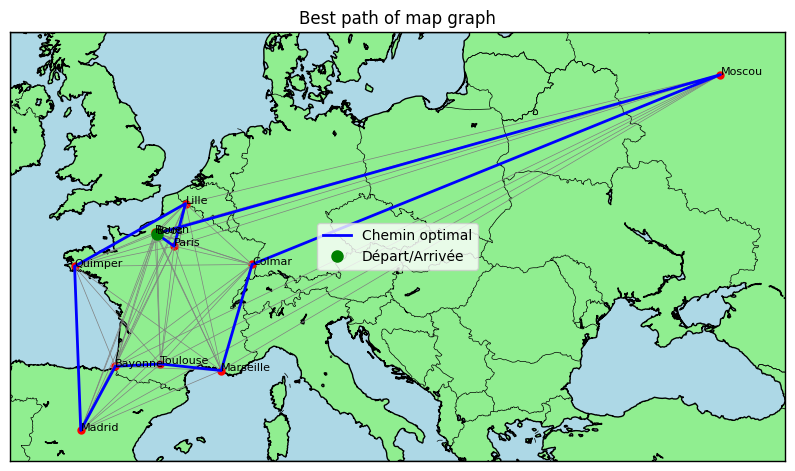

Algorithm Greedy Loop : 

Best path: ['Boos', 'Rouen', 'Paris', 'Lille', 'Colmar', 'Marseille', 'Toulouse', 'Bayonne', 'Madrid', 'Quimper', 'Moscou', 'Boos']
Total distance: 8553.325238837304
Number of iterations needed to find the solution : 0
Total number of iterations : 51


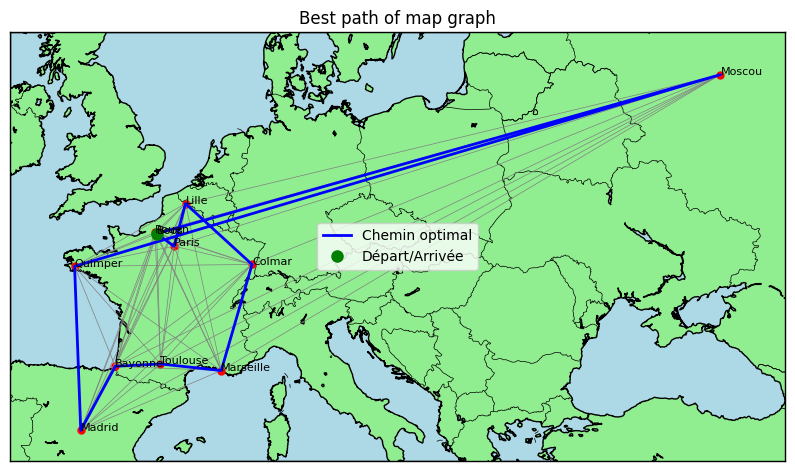

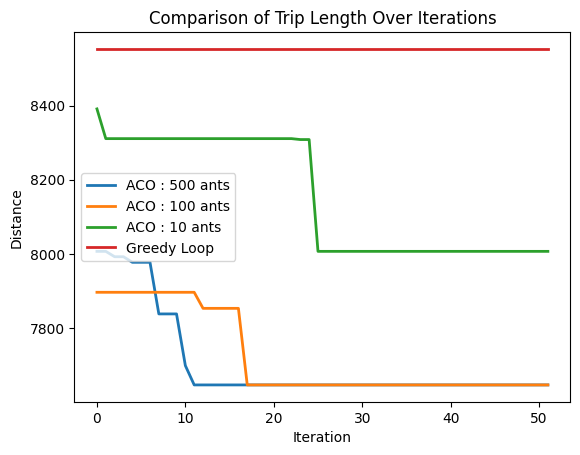

In [ ]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Algorithms.Greedy.GreedyAlgo import GreedyAlgo
from utils.plot import Plot

def run_algorithm(graph,algorithm):
    algorithm.run()
    print(f"Algorithm {algorithm.name} : \n")
    # Print the best path found and the total distance
    graph.plot_graph(algorithm.path)
    print(f"Best path: {algorithm.path}")
    print(f"Total distance: { algorithm.distance}")
    print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
    print(f"Total number of iterations : {algorithm.total_interations_realized}")
    algorithms_results[algorithm.name] = algorithm.distance_history

def run_algorithms(graph, algorithms):
    for algorithm in algorithms:
        run_algorithm(graph,algorithm)
    Plot.plot_comparison_distance_over_iterations(algorithms_results)


algorithms_results = {}
min_iterations = 50
max_iterations = 100
convergence_threshold = 10
ACO0 = AcoAlgo(graph=graph, name="ACO : 500 ants", num_ants=500, decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
ACO1 = AcoAlgo(graph=graph, name="ACO : 100 ants", num_ants=100, decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
ACO2 = AcoAlgo(graph=graph, name="ACO : 10 ants", num_ants=10, decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
Greedy = GreedyAlgo(graph=graph, name= "Greedy Loop", min_iterations=min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [ACO0,ACO1,ACO2, Greedy]
run_algorithms(graph= graph,algorithms=algorithms)

#reset all datas
del ACO1
del ACO2
del algorithms
del algorithms_results

